<a href="https://colab.research.google.com/github/digorcrispim/Ocean_Samsung/blob/main/an_lise_de_queimadas_no_brasil_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Queimadas no Brasil (2020)

## Resumo

Neste notebook, iremos explorar dados territoriais e de queimadas no Brasil utilizando a linguagem Python e as bibliotecas Folium, Shapely e GeoPandas.

In [ ]:
!pip install bs4 # as infos são capturadas pela internet

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import folium #criar mapas dinâmicos ex: html
import matplotlib.pyplot as plt
import seaborn as sns

import os
from urllib.request import urlretrieve
import requests
import zipfile
from bs4 import BeautifulSoup

In [ ]:
#padronização de fonte e tamanho de letra
sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})

## 1) Fontes de dados

### 1.1) Queimadas no Brasil em 2020

* Fonte: [Instituto Nacional de Pesquisas Espaciais (INPE)](http://queimadas.dgi.inpe.br/queimadas)

In [ ]:
df = pd.read_csv('../input/queimadas-brasil-2020/Focos_2020-01-01_2020-12-31.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0
1,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5
2,2020/07/11 16:45:00,AQUA_M-T,Brasil,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0
3,2020/07/11 16:50:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6
4,2020/07/11 16:50:00,AQUA_M-T,Brasil,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7


In [ ]:
df.shape #dimensão do df

(222797, 12)

In [ ]:
#packed shapely
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [ ]:
queimadas_brasil_2020 = gpd.GeoDataFrame(df, crs='EPSG:4326', geometry=geometry)

#EPSG:4326 trabalha as longitudes em graus

In [ ]:
queimadas_brasil_2020.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,POINT (-48.86800 -15.91400)
1,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5,POINT (-48.86400 -15.91100)
2,2020/07/11 16:45:00,AQUA_M-T,Brasil,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0,POINT (-42.34000 -21.89700)
3,2020/07/11 16:50:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6,POINT (-43.88100 -14.83800)
4,2020/07/11 16:50:00,AQUA_M-T,Brasil,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7,POINT (-55.20700 -1.82300)


In [ ]:
queimadas_brasil_2020.shape

(222797, 13)

In [ ]:
queimadas_brasil_2020 = queimadas_brasil_2020.to_crs(crs='EPSG:3857')
#mudando os sistemas de coordenadas
#EPSG3857 trabalha com metros

In [ ]:
#verifincando a conversão
queimadas_brasil_2020.crs.to_string()

'EPSG:3857'

In [ ]:
queimadas_brasil_2020.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,POINT (-5439960.876 -1794765.623)
1,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5,POINT (-5439515.598 -1794418.358)
2,2020/07/11 16:45:00,AQUA_M-T,Brasil,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0,POINT (-4713267.240 -2499163.337)
3,2020/07/11 16:50:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6,POINT (-4884810.575 -1670537.264)
4,2020/07/11 16:50:00,AQUA_M-T,Brasil,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7,POINT (-6145615.128 -202969.680)


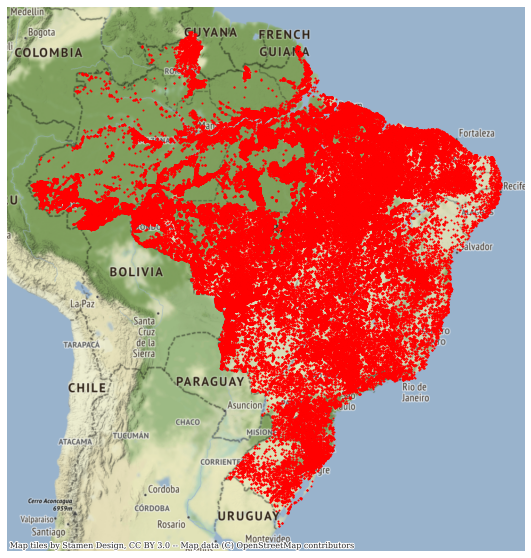

In [ ]:
ax = queimadas_brasil_2020.plot(figsize=(15, 10), markersize=1, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

#pontos de incendio

### 1.2) Malhas municipais do Brasil

* Fonte: [Instituto Brasileiro de Geografia e Estatística (IBGE)](https://www.ibge.gov.br/geociencias/downloads-geociencias.html)

In [ ]:
if not os.path.exists('/kaggle/working/mapas'):
    os.makedirs('/kaggle/working/mapas')
    
#criando pastas no kaggle

In [ ]:
url_brasil_malhas_municipios = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/BR_Municipios_2020.zip'

In [ ]:
%%time

urlretrieve(url_brasil_malhas_municipios, '/kaggle/working/mapas/BR_Municipios_2020.zip')

CPU times: user 3.54 s, sys: 2.39 s, total: 5.93 s
Wall time: 9min 17s


('/kaggle/working/mapas/BR_Municipios_2020.zip',
 <http.client.HTTPMessage at 0x7f36498e6950>)

In [ ]:
with zipfile.ZipFile('/kaggle/working/mapas/BR_Municipios_2020.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/mapas/')

In [ ]:
os.remove('/kaggle/working/mapas/BR_Municipios_2020.zip')

In [ ]:
brasil_malhas_municipios = gpd.read_file('/kaggle/working/mapas/BR_Municipios_2020.shp')

In [ ]:
brasil_malhas_municipios.shape

(5570, 5)

In [ ]:
brasil_malhas_municipios.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


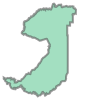

In [ ]:
brasil_malhas_municipios.iloc[0].geometry

In [ ]:
brasil_malhas_municipios.iloc[1].geometry

In [ ]:
brasil_malhas_municipios.crs.to_string()

'EPSG:4674'

In [ ]:
brasil_malhas_municipios.to_crs(epsg=3857, inplace=True) # tranforma a variavel modificada

In [ ]:
brasil_malhas_municipios.crs.to_string() #verificando a transformação

'EPSG:3857'

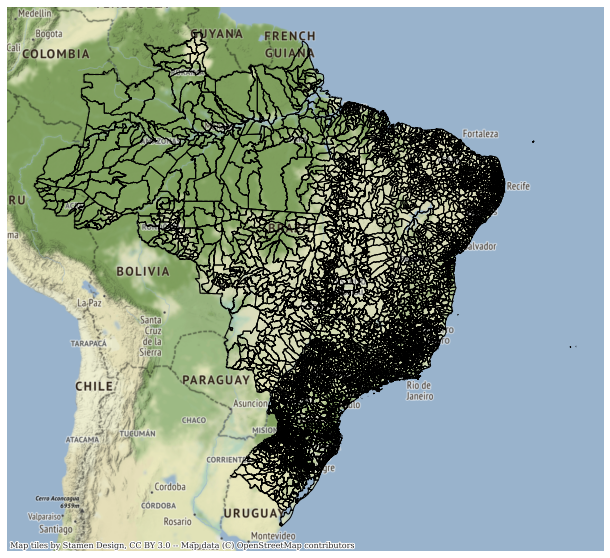

In [ ]:
ax = brasil_malhas_municipios.plot(figsize=(15, 10), edgecolor='black', facecolor='none')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

### 1.3) Localidades brasileiras

* Fonte: [Instituto Brasileiro de Geografia e Estatística (IBGE)](https://www.ibge.gov.br/geociencias/downloads-geociencias.html)

In [ ]:
url_brasil_localidades = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/estrutura_territorial/localidades/Shapefile_SHP/'

In [ ]:
req = requests.get(url_brasil_localidades)

In [ ]:
dados_ibge = BeautifulSoup(req.text, "html.parser")
dados_ibge

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">

<html>
<head>
<title>Index of /organizacao_do_territorio/estrutura_territorial/localidades/Shapefile_SHP</title>
</head>
<body>
<h1>Index of /organizacao_do_territorio/estrutura_territorial/localidades/Shapefile_SHP</h1>
<table>
<tr><th valign="top"><img alt="[ICO]" src="/icons/blank.gif"/></th><th><a href="?C=N;O=D">Name</a></th><th><a href="?C=M;O=A">Last modified</a></th><th><a href="?C=S;O=A">Size</a></th><th><a href="?C=D;O=A">Description</a></th></tr>
<tr><th colspan="5"><hr/></th></tr>
<tr><td valign="top"><img alt="[PARENTDIR]" src="/icons/back.gif"/></td><td><a href="/organizacao_do_territorio/estrutura_territorial/localidades/">Parent Directory</a> </td><td> </td><td align="right">  - </td><td> </td></tr>
<tr><td valign="top"><img alt="[   ]" src="/icons/unknown.gif"/></td><td><a href="BR_Localidades_2010_v1.dbf">BR_Localidades_2010_..&gt;</a></td><td align="right">2016-06-02 01:30  </td><td align="right"> 17M</td><td> 

In [ ]:
%%time

for arq in dados_ibge.find_all('a'):
    if 'BR_Localidades' in arq.get_text():
        print(arq.get_text())
        req = requests.get(url_brasil_localidades + arq["href"])
        print(req.status_code)
        open('/kaggle/working/mapas/' + arq['href'], 'wb').write(req.content)

BR_Localidades_2010_..>
200
BR_Localidades_2010_..>
200
BR_Localidades_2010_..>
200
BR_Localidades_2010_..>
200
CPU times: user 466 ms, sys: 186 ms, total: 652 ms
Wall time: 47.6 s


In [ ]:
brasil_localidades = gpd.read_file('/kaggle/working/mapas/BR_Localidades_2010_v1.shp')

In [ ]:
brasil_localidades.shape

(21886, 23)

In [ ]:
brasil_localidades.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,NM_UF,CD_NIVEL,CD_CATEGOR,NM_CATEGOR,NM_LOCALID,LONG,LAT,ALT,GMRotation,geometry
0,1,110001505000001,URBANO,110001505006,Redondo,11000150500,None,110001505,ALTA FLORESTA D'OESTE,1100015,...,RONDÔNIA,1,05,CIDADE,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,337.735719,0.0,POINT (-61.99982 -11.93554)
1,2,110001515000001,URBANO,None,None,11000151500,None,110001515,FILADÉLFIA D'OESTE,1100015,...,RONDÔNIA,2,15,VILA,FILADÉLFIA D'OESTE,-62.043898,-12.437239,215.244429,0.0,POINT (-62.04390 -12.43724)
2,3,110001520000001,URBANO,None,None,11000152000,None,110001520,IZIDOLÂNDIA,1100015,...,RONDÔNIA,2,20,VILA,IZIDOLÂNDIA,-62.175549,-12.601415,181.044807,0.0,POINT (-62.17555 -12.60142)
3,4,110001525000001,URBANO,None,None,11000152500,None,110001525,NOVA GEASE D'OESTE,1100015,...,RONDÔNIA,2,25,VILA,NOVA GEASE D'OESTE,-62.318650,-11.919792,191.576571,0.0,POINT (-62.31865 -11.91979)
4,5,110001530000001,URBANO,None,None,11000153000,None,110001530,ROLIM DE MOURA DO GUAPORÉ,1100015,...,RONDÔNIA,2,30,VILA,ROLIM DE MOURA DO GUAPORÉ,-62.276812,-13.079806,157.285277,0.0,POINT (-62.27681 -13.07981)


In [ ]:
brasil_localidades.crs.to_string()

'EPSG:4674'

In [ ]:
brasil_localidades.to_crs(epsg=3857, inplace=True)

In [ ]:
brasil_localidades.crs.to_string()

'EPSG:3857'

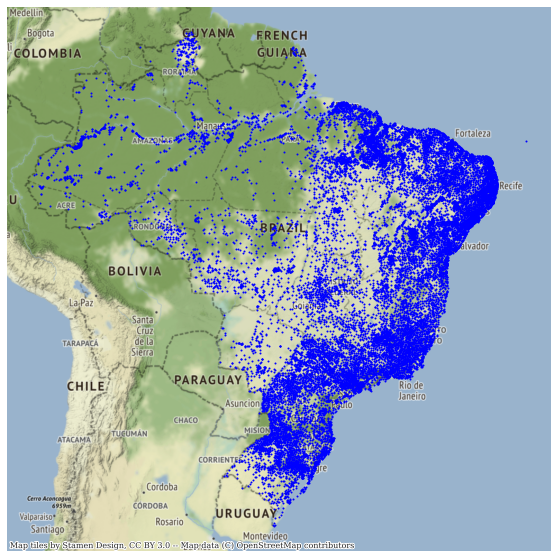

In [ ]:
ax = brasil_localidades.plot(figsize=(15, 10), markersize=1, color='blue')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

## 2) O que podemos extrair de informações dos dados?

### 2.1) Queimadas e biomas

In [ ]:
queimadas_brasil_2020.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,POINT (-5439960.876 -1794765.623)
1,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5,POINT (-5439515.598 -1794418.358)
2,2020/07/11 16:45:00,AQUA_M-T,Brasil,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0,POINT (-4713267.240 -2499163.337)
3,2020/07/11 16:50:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6,POINT (-4884810.575 -1670537.264)
4,2020/07/11 16:50:00,AQUA_M-T,Brasil,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7,POINT (-6145615.128 -202969.680)


In [ ]:
queimadas_brasil_2020['bioma'].unique()

array(['Cerrado', 'Mata Atlantica', 'Caatinga', 'Amazonia', 'Pantanal',
       'Pampa'], dtype=object)

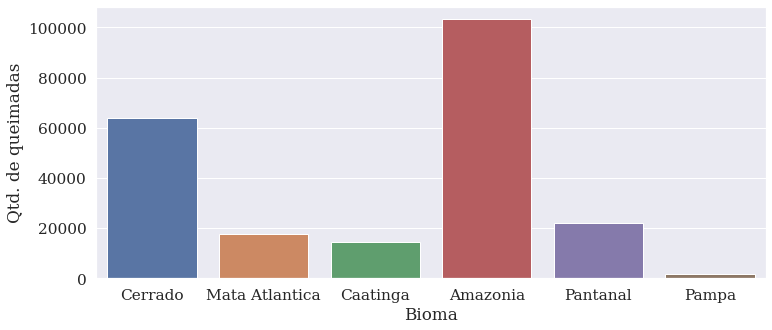

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='bioma', data=queimadas_brasil_2020)
ax.set_xlabel('Bioma')
ax.set_ylabel('Qtd. de queimadas')
plt.show()

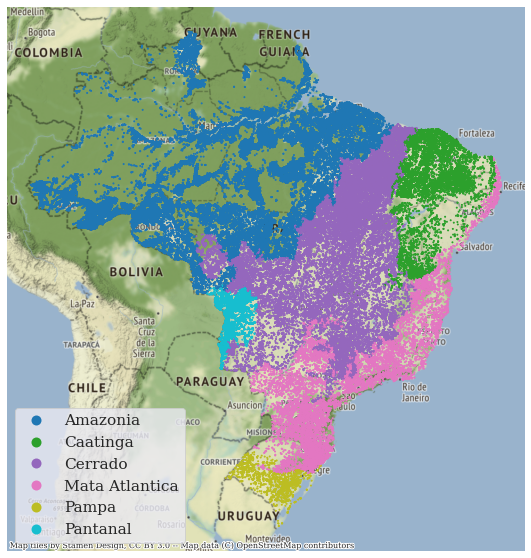

In [ ]:
ax = queimadas_brasil_2020.plot(figsize=(15, 10), column='bioma', markersize=1, legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

### 2.2) Filtrando e visualizando o risco de fogo

In [ ]:
queimadas_brasil_2020.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,POINT (-5439960.876 -1794765.623)
1,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5,POINT (-5439515.598 -1794418.358)
2,2020/07/11 16:45:00,AQUA_M-T,Brasil,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0,POINT (-4713267.240 -2499163.337)
3,2020/07/11 16:50:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6,POINT (-4884810.575 -1670537.264)
4,2020/07/11 16:50:00,AQUA_M-T,Brasil,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7,POINT (-6145615.128 -202969.680)


In [ ]:
queimadas_brasil_2020['riscofogo'] >= 1

0          True
1         False
2         False
3          True
4         False
          ...  
222792    False
222793    False
222794    False
222795    False
222796    False
Name: riscofogo, Length: 222797, dtype: bool

In [ ]:
queimadas_risco_alto = queimadas_brasil_2020[queimadas_brasil_2020['riscofogo'] >= 1]
queimadas_risco_alto.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,POINT (-5439960.876 -1794765.623)
3,2020/07/11 16:50:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6,POINT (-4884810.575 -1670537.264)
6,2020/07/11 16:50:00,AQUA_M-T,Brasil,TOCANTINS,PALMEIRANTE,Cerrado,39.0,0.0,1.0,-7.808,-48.028,8.3,POINT (-5346452.504 -871885.401)
8,2020/07/11 16:50:00,AQUA_M-T,Brasil,MATO GROSSO,CAMPINAPOLIS,Cerrado,47.0,0.0,1.0,-14.347,-53.372,65.6,POINT (-5941343.863 -1614057.282)
12,2020/07/11 18:30:00,AQUA_M-T,Brasil,ACRE,RIO BRANCO,Amazonia,2.0,0.0,1.0,-9.991,-67.737,12.7,POINT (-7540448.348 -1117872.658)


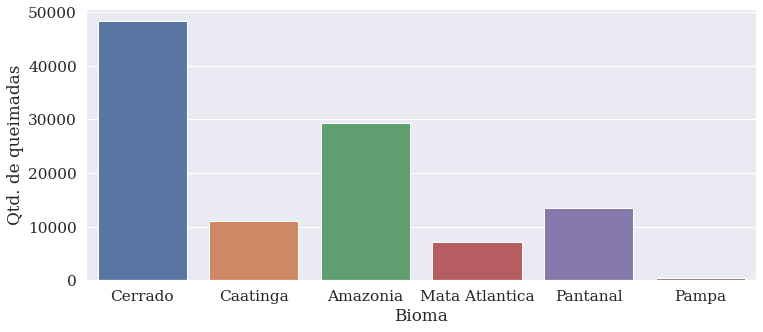

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='bioma', data=queimadas_risco_alto)
ax.set_xlabel('Bioma')
ax.set_ylabel('Qtd. de queimadas')
plt.show()

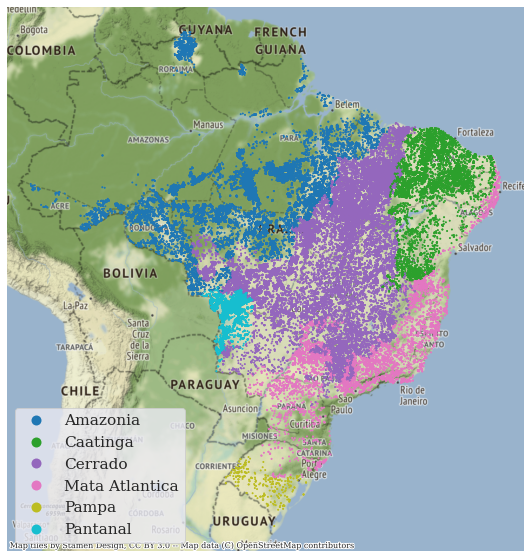

In [ ]:
ax = queimadas_risco_alto.plot(figsize=(15, 10), column='bioma', markersize=1, legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

### 2.3) Entendendo as categorias das localidades

In [ ]:
brasil_localidades.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,NM_UF,CD_NIVEL,CD_CATEGOR,NM_CATEGOR,NM_LOCALID,LONG,LAT,ALT,GMRotation,geometry
0,1,110001505000001,URBANO,110001505006,Redondo,11000150500,None,110001505,ALTA FLORESTA D'OESTE,1100015,...,RONDÔNIA,1,05,CIDADE,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,337.735719,0.0,POINT (-6901788.825 -1338373.356)
1,2,110001515000001,URBANO,None,None,11000151500,None,110001515,FILADÉLFIA D'OESTE,1100015,...,RONDÔNIA,2,15,VILA,FILADÉLFIA D'OESTE,-62.043898,-12.437239,215.244429,0.0,POINT (-6906695.095 -1395509.874)
2,3,110001520000001,URBANO,None,None,11000152000,None,110001520,IZIDOLÂNDIA,1100015,...,RONDÔNIA,2,20,VILA,IZIDOLÂNDIA,-62.175549,-12.601415,181.044807,0.0,POINT (-6921350.509 -1414231.090)
3,4,110001525000001,URBANO,None,None,11000152500,None,110001525,NOVA GEASE D'OESTE,1100015,...,RONDÔNIA,2,25,VILA,NOVA GEASE D'OESTE,-62.318650,-11.919792,191.576571,0.0,POINT (-6937280.400 -1336581.629)
4,5,110001530000001,URBANO,None,None,11000153000,None,110001530,ROLIM DE MOURA DO GUAPORÉ,1100015,...,RONDÔNIA,2,30,VILA,ROLIM DE MOURA DO GUAPORÉ,-62.276812,-13.079806,157.285277,0.0,POINT (-6932623.030 -1468851.439)


In [ ]:
brasil_localidades.columns

Index(['ID', 'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODS',
       'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MICRO', 'NM_MESO', 'NM_UF', 'CD_NIVEL', 'CD_CATEGOR', 'NM_CATEGOR',
       'NM_LOCALID', 'LONG', 'LAT', 'ALT', 'GMRotation', 'geometry'],
      dtype='object')

In [ ]:
brasil_localidades['NM_CATEGOR'].unique()

array(['CIDADE', 'VILA', 'POVOADO', 'ALDEIA INDÍGENA', 'NÚCLEO',
       'PROJETO DE ASSENTAMENTO', 'LUGAREJO', 'AUI'], dtype=object)

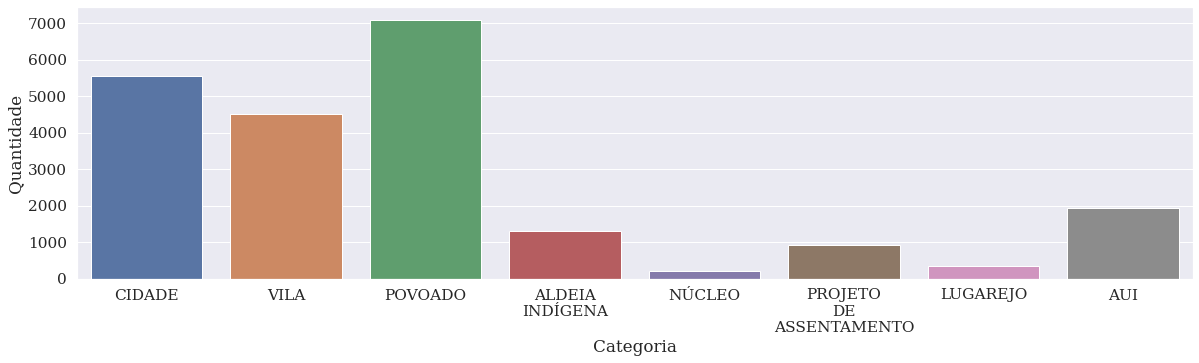

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='NM_CATEGOR', data=brasil_localidades)
ax.set_xlabel('Categoria')

labels = [l.replace(' ', '\n') for l in brasil_localidades['NM_CATEGOR'].unique()]
ax.set_xticklabels(labels=labels)

ax.set_ylabel('Quantidade')
plt.show()

In [ ]:
aldeias_indigenas = brasil_localidades[brasil_localidades['NM_CATEGOR'] == 'ALDEIA INDÍGENA']
aldeias_indigenas.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,NM_UF,CD_NIVEL,CD_CATEGOR,NM_CATEGOR,NM_LOCALID,LONG,LAT,ALT,GMRotation,geometry
11,12,110004910000027,RURAL,None,None,11000491000,None,110004910,RIOZINHO,1100049,...,RONDÔNIA,5,00007,ALDEIA INDÍGENA,ALDEIA INDÍGENA SURUÍ - LINHA 14,-61.180935,-11.190620,256.534383,0.0,POINT (-6810630.543 -1253730.758)
12,13,110004910000028,RURAL,None,None,11000491000,None,110004910,RIOZINHO,1100049,...,RONDÔNIA,5,00006,ALDEIA INDÍGENA,ALDEIA INDÍGENA - LINHA 14,-61.176371,-11.231878,258.142759,0.0,POINT (-6810122.501 -1258412.863)
13,14,110004910000029,RURAL,None,None,11000491000,None,110004910,RIOZINHO,1100049,...,RONDÔNIA,5,00005,ALDEIA INDÍGENA,ALDEIA INDÍGENA - LINHA 12,-61.248991,-11.220610,205.526414,0.0,POINT (-6818206.488 -1257134.108)
14,15,110004910000030,RURAL,None,None,11000491000,None,110004910,RIOZINHO,1100049,...,RONDÔNIA,5,00004,ALDEIA INDÍGENA,ALDEIA INDÍGENA - LINHA 11,-61.305255,-11.175844,227.287546,0.0,POINT (-6824469.743 -1252054.064)
15,16,110004910000032,RURAL,None,None,11000491000,None,110004910,RIOZINHO,1100049,...,RONDÔNIA,5,00003,ALDEIA INDÍGENA,ALDEIA INDÍGENA - LINHA 10,-61.322750,-11.095900,197.418105,0.0,POINT (-6826417.250 -1242983.941)


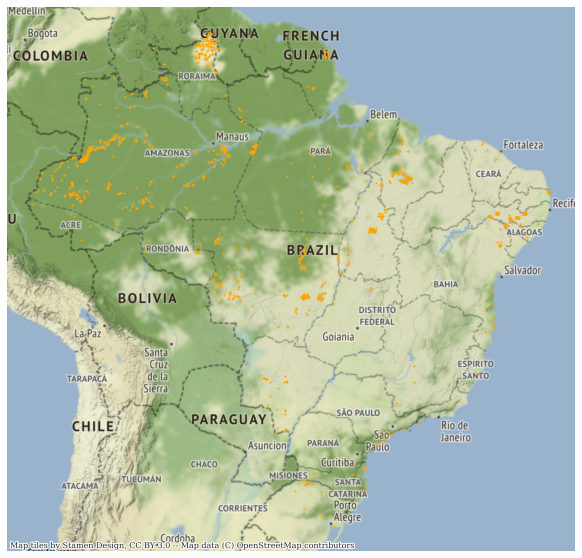

In [ ]:
ax = aldeias_indigenas.plot(figsize=(15, 10), markersize=1, color='orange')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

## 3) Trabalhando com camadas de dados

In [ ]:
aldeias_indigenas.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,NM_UF,CD_NIVEL,CD_CATEGOR,NM_CATEGOR,NM_LOCALID,LONG,LAT,ALT,GMRotation,geometry
11,12,110004910000027,RURAL,None,None,11000491000,None,110004910,RIOZINHO,1100049,...,RONDÔNIA,5,00007,ALDEIA INDÍGENA,ALDEIA INDÍGENA SURUÍ - LINHA 14,-61.180935,-11.190620,256.534383,0.0,POINT (-6810630.543 -1253730.758)
12,13,110004910000028,RURAL,None,None,11000491000,None,110004910,RIOZINHO,1100049,...,RONDÔNIA,5,00006,ALDEIA INDÍGENA,ALDEIA INDÍGENA - LINHA 14,-61.176371,-11.231878,258.142759,0.0,POINT (-6810122.501 -1258412.863)
13,14,110004910000029,RURAL,None,None,11000491000,None,110004910,RIOZINHO,1100049,...,RONDÔNIA,5,00005,ALDEIA INDÍGENA,ALDEIA INDÍGENA - LINHA 12,-61.248991,-11.220610,205.526414,0.0,POINT (-6818206.488 -1257134.108)
14,15,110004910000030,RURAL,None,None,11000491000,None,110004910,RIOZINHO,1100049,...,RONDÔNIA,5,00004,ALDEIA INDÍGENA,ALDEIA INDÍGENA - LINHA 11,-61.305255,-11.175844,227.287546,0.0,POINT (-6824469.743 -1252054.064)
15,16,110004910000032,RURAL,None,None,11000491000,None,110004910,RIOZINHO,1100049,...,RONDÔNIA,5,00003,ALDEIA INDÍGENA,ALDEIA INDÍGENA - LINHA 10,-61.322750,-11.095900,197.418105,0.0,POINT (-6826417.250 -1242983.941)


In [ ]:
aldeia = aldeias_indigenas.loc[11, 'geometry']

In [ ]:
dist_aldeia = queimadas_risco_alto.distance(aldeia)
dist_aldeia

0         1.473585e+06
3         1.970409e+06
6         1.513150e+06
8         9.410072e+05
12        7.423553e+05
              ...     
222762    3.730747e+05
222778    1.698486e+06
222779    9.270883e+05
222790    5.572521e+05
222791    2.391246e+06
Length: 109554, dtype: float64

In [ ]:
dist_aldeia.min()

7519.118055229182

In [ ]:
agregados = gpd.sjoin(queimadas_risco_alto, brasil_malhas_municipios, op='within')

In [ ]:
agregados.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry,index_right,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,POINT (-5439960.876 -1794765.623),5391,5205802,Corumbá de Goiás,GO,1061.955
36106,2020/08/17 17:01:39,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,83.0,0.0,1.0,-15.915,-48.527,NaN,POINT (-5402000.930 -1794881.379),5391,5205802,Corumbá de Goiás,GO,1061.955
36107,2020/08/17 17:01:39,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,83.0,0.0,1.0,-15.917,-48.520,NaN,POINT (-5401221.693 -1795112.894),5391,5205802,Corumbá de Goiás,GO,1061.955
76944,2020/09/06 16:40:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,103.0,0.0,1.0,-15.781,-48.605,14.3,POINT (-5410683.850 -1779375.166),5391,5205802,Corumbá de Goiás,GO,1061.955
76948,2020/09/06 16:40:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,103.0,0.0,1.0,-15.780,-48.593,15.2,POINT (-5409348.016 -1779259.486),5391,5205802,Corumbá de Goiás,GO,1061.955


In [ ]:
queimadas_muni = agregados.groupby(by='NM_MUN').size()
queimadas_muni

NM_MUN
Abadia de Goiás            5
Abadia dos Dourados        8
Abadiânia                 14
Abaeté                    14
Abaiara                    4
                          ..
Águas de Santa Bárbara     5
Águia Branca               1
Álvares Florence          12
Érico Cardoso              2
Óbidos                    64
Length: 3349, dtype: int64

## 4) Trabalhando com o Folium

In [ ]:
coord_centro_brasil = [-14.235004, -51.925282]

In [ ]:
mapa = folium.Map(location=coord_centro_brasil, zoom_start=4)
mapa

In [ ]:
queimadas_muni

NM_MUN
Abadia de Goiás            5
Abadia dos Dourados        8
Abadiânia                 14
Abaeté                    14
Abaiara                    4
                          ..
Águas de Santa Bárbara     5
Águia Branca               1
Álvares Florence          12
Érico Cardoso              2
Óbidos                    64
Length: 3349, dtype: int64

In [ ]:
queimadas_muni_df = queimadas_muni.to_frame()
queimadas_muni_df

,0
NM_MUN,
Abadia de Goiás,5
Abadia dos Dourados,8
Abadiânia,14
Abaeté,14
Abaiara,4
...,...
Águas de Santa Bárbara,5
Águia Branca,1
Álvares Florence,12


In [ ]:
queimadas_muni_df = queimadas_muni_df.reset_index()
queimadas_muni_df.columns = ['NM_MUN', 'qtd_queimadas']
queimadas_muni_df

,NM_MUN,qtd_queimadas
0,Abadia de Goiás,5
1,Abadia dos Dourados,8
2,Abadiânia,14
3,Abaeté,14
4,Abaiara,4
...,...,...
3344,Águas de Santa Bárbara,5
3345,Águia Branca,1
3346,Álvares Florence,12
3347,Érico Cardoso,2


In [ ]:
queimadas_muni_geom_df = pd.merge(brasil_malhas_municipios, queimadas_muni_df, on='NM_MUN')
queimadas_muni_geom_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,qtd_queimadas
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-6923476.398 -1326078.161, -6923328....",41
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-6961528.932 -1088632.784, -6960546....",35
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-6720490.637 -1501640.734, -6720507....",7
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-6790577.561 -1265846.748, -6790603....",32
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-6846122.143 -1460332.136, -6845936....",13
...,...,...,...,...,...,...
3586,5222005,Vianópolis,GO,954.284,"POLYGON ((-5385763.685 -1877961.339, -5385701....",6
3587,5222054,Vicentinópolis,GO,737.255,"POLYGON ((-5548671.513 -1988752.713, -5548560....",11
3588,5222203,Vila Boa,GO,1060.172,"POLYGON ((-5244723.899 -1651672.222, -5244582....",13
3589,5222302,Vila Propício,GO,2181.583,"POLYGON ((-5427477.712 -1673377.889, -5427402....",16


In [ ]:
mapa.choropleth(geo_data = queimadas_muni_geom_df,
                name = 'geometry',
                data = queimadas_muni_geom_df,
                columns = ['NM_MUN', 'qtd_queimadas'],
                key_on = 'feature.properties.NM_MUN',
                fill_color = 'YlGn',
                fill_opacity = 0.75,
                line_opacity = 0.5,
                legend_name = 'Quantidade de queimadas por município')
mapa

/opt/conda/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
